In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import make_scorer

In [45]:
def rmse(y_true, y_pred):
    e = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return e

In [3]:
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scale', StandardScaler()),
    ('linear', LinearRegression())
])

In [5]:
reg = GridSearchCV(pipe, {
    'poly__degree': [i for i in range(1, 5)]
})

In [4]:
PolynomialFeatures?

In [14]:
cols = ['mpg', 'cylinders', 'displacement',
        'horsepower', 'weight', 'acceleration',
        'model year', 'origin', 'car name']
df = pd.read_csv("data/auto-mpg.data", sep='\s+', names=cols, na_values="?")

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
!cat data/auto-mpg.names

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [17]:
df.dropna(inplace=True)

In [78]:
df['inverse horsepower'] = df['horsepower'] ** -1
df['inverse displacement'] = df['displacement'] ** -1
df['inverse weight'] = df['weight'] ** -1

In [79]:
continuous_cols = ['displacement', 'horsepower', 'weight', 
                   'acceleration', 'model year', 'inverse horsepower', 
                   'inverse displacement', 'inverse weight']
y = df['mpg'].values
x = df[continuous_cols].values
xt, xv, yt, yv = train_test_split(x, y)

In [80]:
reg.fit(xt, yt)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

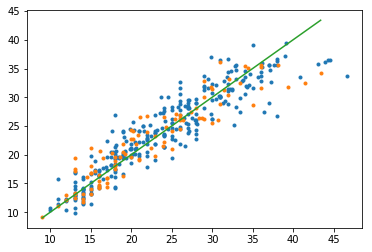

In [81]:
plt.plot(yt, reg.predict(xt), ".")
plt.plot(yv, reg.predict(xv), ".")
plt.plot([min(yv), max(yv)], [min(yv), max(yv)])
plt.show()

In [82]:
pipe_noscale = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])
reg_noscale = GridSearchCV(pipe, {
    'poly__degree': [i for i in range(1, 5)]
})

In [83]:
reg_noscale.fit(xt, yt)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

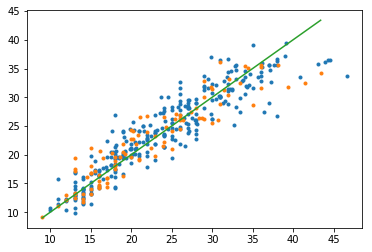

In [84]:
plt.plot(yt, reg_noscale.predict(xt), ".")
plt.plot(yv, reg_noscale.predict(xv), ".")
plt.plot([min(yv), max(yv)], [min(yv), max(yv)])
plt.show()

In [104]:
pipe3 = Pipeline([
    ('poly', PolynomialFeatures()),
    ('kb', SelectKBest(mutual_info_regression)),
    ('linear', LinearRegression())
])
reg_bestfeature = GridSearchCV(
    pipe3, 
    {
        'poly__degree': [i for i in range(1, 5)],
        'kb__k': [i for i in range(1, 7)]
    },
    scoring=make_scorer(rmse, greater_is_better=False)
)

In [105]:
reg_bestfeature.fit(xt, yt)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('kb', SelectKBest(k=10, score_func=<function mutual_info_regression at 0x1113662f0>)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [1, 2, 3, 4], 'kb__k': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

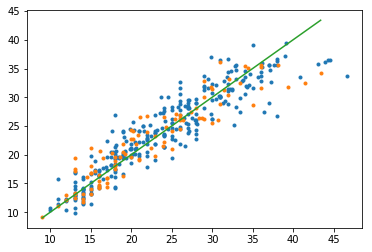

In [98]:
plt.plot(yt, reg_noscale.predict(xt), ".")
plt.plot(yv, reg_noscale.predict(xv), ".")
plt.plot([min(yv), max(yv)], [min(yv), max(yv)])
plt.show()

In [99]:
reg_bestfeature.cv_results_

{'mean_fit_time': array([ 0.00347114,  0.00494671,  0.00724157,  0.01086195,  0.00312201,
         0.00547028,  0.00809209,  0.01166145,  0.00315181,  0.00417638,
         0.00744136,  0.01111515,  0.00266663,  0.00494536,  0.007725  ,
         0.01092466,  0.0033137 ,  0.00560363,  0.00671705,  0.01334397,
         0.00301377,  0.00418027,  0.00631301,  0.01126432]),
 'std_fit_time': array([  5.45075175e-04,   1.76093171e-04,   1.82591270e-03,
          9.84200699e-05,   7.55003954e-04,   1.19145610e-03,
          4.57646365e-04,   1.12187540e-03,   4.81970547e-04,
          7.90437334e-04,   1.84996390e-03,   7.40151355e-05,
          3.70022579e-04,   4.71389259e-04,   2.08703476e-03,
          6.42882877e-05,   8.12987109e-04,   1.38644374e-03,
          2.08822657e-03,   1.99446498e-03,   2.83532144e-04,
          5.09953369e-04,   2.03777218e-03,   1.81380711e-04]),
 'mean_score_time': array([ 0.00076326,  0.00193946,  0.00524298,  0.01364509,  0.00079648,
         0.00178663,  0

In [100]:
reg_bestfeature.score(xv, yv)

-2.8284856308162465

In [101]:
(3.88811235 + 3.79180157 + 3.48411745) / 3

3.72134379